# Import the libraries for the analysis

In [1322]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime as dt

# Read the dataset and give it a quick overview

In [1325]:
data = pd.read_csv(r"C:\Users\yengl\Desktop\CodeOp\First Individual Project\data\anime.csv")

In [1327]:
data.head()

,Title,Score,Vote,Ranked,Popularity,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating
0,Sousou no FrierenFrieren: Beyond Journey's End,9.14,128768,1,508,28,Currently Airing,"Sep 29, 2023 to Mar 2024",Fall 2023,"['Aniplex', 'Dentsu', 'Shogakukan-Shueisha Pro...","None found, add some",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older
1,Fullmetal Alchemist: Brotherhood,9.09,2080863,2,3,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","Funimation, Aniplex of America",Bones,Manga,24 min. per ep.,R - 17+ (violence & profanity)
2,Steins;Gate,9.07,1375512,3,13,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,"['Frontier Works', 'Media Factory', 'Kadokawa ...",Funimation,White Fox,Visual novel,24 min. per ep.,PG-13 - Teens 13 or older
3,Gintama°Gintama Season 4,9.06,246431,4,337,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,"['TV Tokyo', 'Aniplex', 'Dentsu']","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,24 min. per ep.,PG-13 - Teens 13 or older
4,Shingeki no Kyojin Season 3 Part 2Attack on Ti...,9.05,1545108,5,21,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",Funimation,Wit Studio,Manga,23 min. per ep.,R - 17+ (violence & profanity)


# Analyze the data, rows, columns, non-null values, important variables, etc

In [1330]:
n_rows , n_cols = data.shape
print(f'There are {n_rows} rows and {n_cols} columns in the dataset')

There are 10000 rows and 15 columns in the dataset


In [1332]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       10000 non-null  object 
 1   Score       10000 non-null  float64
 2   Vote        10000 non-null  int64  
 3   Ranked      10000 non-null  int64  
 4   Popularity  10000 non-null  int64  
 5   Episodes    10000 non-null  object 
 6   Status      10000 non-null  object 
 7   Aired       10000 non-null  object 
 8   Premiered   4878 non-null   object 
 9   Producers   10000 non-null  object 
 10  Licensors   10000 non-null  object 
 11  Studios     10000 non-null  object 
 12  Source      10000 non-null  object 
 13  Duration    10000 non-null  object 
 14  Rating      9980 non-null   object 
dtypes: float64(1), int64(3), object(11)
memory usage: 1.1+ MB


# Data Preprocessing: search for duplicate rows and eliminate them

In [1335]:
data.duplicated().sum()

1631

In [1337]:
data.drop_duplicates(keep='first', inplace=True)
data.shape

(8369, 15)

# Search for NaN values and decide to keep them or not 

In [1340]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8369 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       8369 non-null   object 
 1   Score       8369 non-null   float64
 2   Vote        8369 non-null   int64  
 3   Ranked      8369 non-null   int64  
 4   Popularity  8369 non-null   int64  
 5   Episodes    8369 non-null   object 
 6   Status      8369 non-null   object 
 7   Aired       8369 non-null   object 
 8   Premiered   4010 non-null   object 
 9   Producers   8369 non-null   object 
 10  Licensors   8369 non-null   object 
 11  Studios     8369 non-null   object 
 12  Source      8369 non-null   object 
 13  Duration    8369 non-null   object 
 14  Rating      8352 non-null   object 
dtypes: float64(1), int64(3), object(11)
memory usage: 1.0+ MB


Here we can see that almost all the rows seem to have useful information. However the rating is an important variable and not having information there could impact our study. On the other hand, The premiered column has a lot of NaN values, but deleting them will represent erasing almost 50% of our data which will affect the study.

In [1343]:
nan_count_per_column = data.isna().sum()
print(nan_count_per_column)

Title            0
Score            0
Vote             0
Ranked           0
Popularity       0
Episodes         0
Status           0
Aired            0
Premiered     4359
Producers        0
Licensors        0
Studios          0
Source           0
Duration         0
Rating          17
dtype: int64


there are 17 rows in Rating that should be evaluated and eliminated, this represents a 0.2% of our sample

In [1346]:
data_cleaned = data.dropna(subset=['Rating'])

During the revision, it was determined that some titles are repeated and there are minimal differences between the entries, so in order to have better results, the duplicate of the title will be removed as well.

In [1349]:
data_cleaned = data_cleaned.drop_duplicates(subset='Title', keep='first')

In [1350]:
data_cleaned.reset_index(drop=True, inplace = True)

In [1351]:
data_cleaned.shape

(4987, 15)

In [1355]:
data_cleaned.tail()

,Title,Score,Vote,Ranked,Popularity,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating
4982,Sword Art Online: Alicization - Recollection,6.81,20339,4998,3259,1,Finished Airing,"Feb 17, 2019",NaN,['Egg Firm'],Aniplex of America,A-1 Pictures,Light novel,24 min.,PG-13 - Teens 13 or older
4983,Taimadou Gakuen 35 Shiken ShoutaiAnti-Magic Ac...,6.81,146677,4999,752,12,Finished Airing,"Oct 8, 2015 to Dec 24, 2015",Fall 2015,"['KlockWorx', 'MAGES.', 'Glovision', 'Kadokawa...",Discotek Media,SILVER LINK.,Light novel,23 min. per ep.,R - 17+ (violence & profanity)
4984,Taiyou no Mokushiroku: A Spirit of the Sun,6.81,900,5000,9592,2,Finished Airing,"Sep 17, 2006 to Sep 18, 2006",NaN,['Tohokushinsha Film Corporation'],Maiden Japan,Madhouse,Manga,1 hr. 17 min. per ep.,R - 17+ (violence & profanity)
4985,Weiß Kreuz OVAKnight Hunters OVA,6.81,2547,5002,7874,2,Finished Airing,"Nov 25, 1999 to Feb 23, 2000",NaN,['Marine Entertainment'],"None found, add some","Triangle Staff, animate Film",Unknown,30 min. per ep.,R - 17+ (violence & profanity)
4986,Wo Shi Da Shenxian 2nd SeasonDa Shen Xian,6.81,504,5003,12521,16,Finished Airing,"Feb 25, 2021 to Jun 10, 2021",NaN,['Tencent Animation & Comics'],"None found, add some",CG Year,Web manga,20 min. per ep.,PG-13 - Teens 13 or older


just to verify that the cleaning and reset was done succesfully. Now we proceed to separate the 'Aired' column, into 2 different rows 'Release date' and 'Completed date'. This will come handy in further analysis.

In [1358]:
start_date = []
end_date = []

for i in range(len(data_cleaned)):
    aired_value = data_cleaned.iloc[i, 7]
    
    if isinstance(aired_value, str) and 'to' in aired_value:
        s, e = aired_value.split('to')
    else:
        s = aired_value if isinstance(aired_value, str) else None
        e = aired_value if isinstance(aired_value, str) else None

    start_date.append(s.strip() if s else None)
    end_date.append(e.strip() if e else None)


Now we proceed to convert the data into a useful format (datestamp)

In [1361]:
date_df = pd.DataFrame({'Release date': start_date, 'Completed date': end_date})

# Assigning the new columns
data_cleaned['Release date'] = date_df['Release date']
data_cleaned['Completed date'] = date_df['Completed date']

# Convert 'Release date' and 'Completed date' to datetime64 and set time to midnight
data_cleaned['Release date'] = pd.to_datetime(data_cleaned['Release date'], errors='coerce').dt.normalize()
data_cleaned['Completed date'] = pd.to_datetime(data_cleaned['Completed date'], errors='coerce').dt.normalize()

In [1363]:
data_cleaned_2 = data_cleaned.dropna(subset=['Release date'])

In [1365]:
data_cleaned_2.reset_index(drop=True, inplace = True)

In [1372]:
data_cleaned_2['Episodes'] = pd.to_numeric(data_cleaned_2['Episodes'], errors='coerce').astype('Int64')

In [1374]:
data_cleaned_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4964 entries, 0 to 4963
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Title           4964 non-null   object        
 1   Score           4964 non-null   float64       
 2   Vote            4964 non-null   int64         
 3   Ranked          4964 non-null   int64         
 4   Popularity      4964 non-null   int64         
 5   Episodes        4941 non-null   Int64         
 6   Status          4964 non-null   object        
 7   Aired           4964 non-null   object        
 8   Premiered       2431 non-null   object        
 9   Producers       4964 non-null   object        
 10  Licensors       4964 non-null   object        
 11  Studios         4964 non-null   object        
 12  Source          4964 non-null   object        
 13  Duration        4964 non-null   object        
 14  Rating          4964 non-null   object        
 15  Rele

In the last step the variable Epsiodes was change from an object to an int, in order to perform some useful calculations in the future. Now our Dataframe is cleaned, there are no duplicates and NaN values in important columns.

# 1.	Which anime have the highest and lowest scores?

In [1378]:
highest_score_anime = data_cleaned_2[data_cleaned_2['Score'] == data_cleaned_2['Score'].max()]
lowest_score_anime = data_cleaned_2[data_cleaned_2['Score'] == data_cleaned_2['Score'].min()]

print("Highest Scored Anime:")
print(highest_score_anime[['Title', 'Score']])

print("\nLowest Scored Anime:")
print(lowest_score_anime[['Title', 'Score']])

Highest Scored Anime:
                                            Title  Score
0  Sousou no FrierenFrieren: Beyond Journey's End   9.14

Lowest Scored Anime:
                                                  Title  Score
4922  Lupin III: Bye Bye Liberty - Kiki Ippatsu!Lupi...    6.8


with this code we can check that our Frieren occupies the #1 position as the highest scored anime, while Lupin III is the least scored Anime.

Text(0.5, 1.0, 'Distribution of Score')

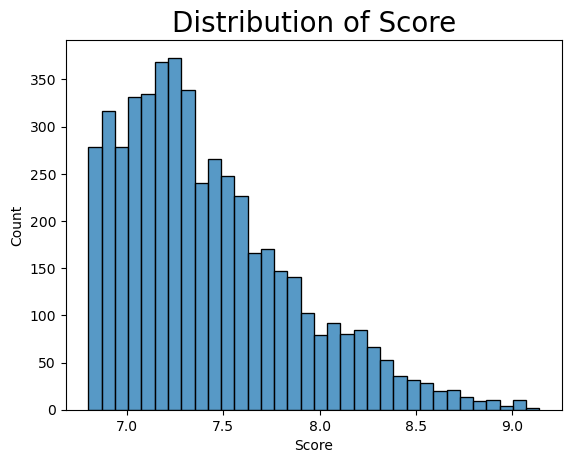

In [1381]:
sns.histplot(data = data_cleaned_2, x='Score')
plt.title("Distribution of Score", fontsize=20)

The scale for the scores is from 1-10. However the lowest score is 6.8 and the highest is around 9.

There is a peak between 7.0 and 7.5, indicating that this is the most common score range for animes. The distribution shows a long tail to the right, indicating that there are some anime with very high scores (but they are rare).  

Here we see the top 5 animes

In [1385]:
data_cleaned_2.head()

,Title,Score,Vote,Ranked,Popularity,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Release date,Completed date
0,Sousou no FrierenFrieren: Beyond Journey's End,9.14,128768,1,508,28,Currently Airing,"Sep 29, 2023 to Mar 2024",Fall 2023,"['Aniplex', 'Dentsu', 'Shogakukan-Shueisha Pro...","None found, add some",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,2023-09-29,2024-03-01
1,Fullmetal Alchemist: Brotherhood,9.09,2080863,2,3,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","Funimation, Aniplex of America",Bones,Manga,24 min. per ep.,R - 17+ (violence & profanity),2009-04-05,2010-07-04
2,Steins;Gate,9.07,1375512,3,13,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,"['Frontier Works', 'Media Factory', 'Kadokawa ...",Funimation,White Fox,Visual novel,24 min. per ep.,PG-13 - Teens 13 or older,2011-04-06,2011-09-14
3,Gintama°Gintama Season 4,9.06,246431,4,337,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,"['TV Tokyo', 'Aniplex', 'Dentsu']","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,24 min. per ep.,PG-13 - Teens 13 or older,2015-04-08,2016-03-30
4,Shingeki no Kyojin Season 3 Part 2Attack on Ti...,9.05,1545108,5,21,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",Funimation,Wit Studio,Manga,23 min. per ep.,R - 17+ (violence & profanity),2019-04-29,2019-07-01


Here we see the bottom 5 animes

In [1390]:
data_cleaned_2.sort_values(by='Score')

,Title,Score,Vote,Ranked,Popularity,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Release date,Completed date
4922,Lupin III: Bye Bye Liberty - Kiki Ippatsu!Lupi...,6.80,3890,5025,6680,1,Finished Airing,"Apr 1, 1989",NaN,['VAP'],Discotek Media,Tokyo Movie Shinsha,Manga,1 hr. 37 min.,R+ - Mild Nudity,1989-04-01,1989-04-01
4963,Wo Shi Da Shenxian 2nd SeasonDa Shen Xian,6.81,504,5003,12521,16,Finished Airing,"Feb 25, 2021 to Jun 10, 2021",NaN,['Tencent Animation & Comics'],"None found, add some",CG Year,Web manga,20 min. per ep.,PG-13 - Teens 13 or older,2021-02-25,2021-06-10
4935,ACCA: 13-ku Kansatsu-ka Specials,6.81,3226,4970,6202,6,Finished Airing,"Apr 21, 2017 to Aug 29, 2017",NaN,['add some'],Funimation,Madhouse,Manga,5 min. per ep.,PG-13 - Teens 13 or older,2017-04-21,2017-08-29
4934,Shinmai Maou no Testament BurstThe Testament o...,6.81,217845,4969,565,10,Finished Airing,"Oct 10, 2015 to Dec 12, 2015",Fall 2015,"['Kadokawa Shoten', 'Nippon Columbia']","Funimation, Crunchyroll",Production IMS,Light novel,23 min. per ep.,R+ - Mild Nudity,2015-10-10,2015-12-12
4933,Shingetsutan TsukihimeLunar Legend Tsukihime,6.81,71008,4968,1364,12,Finished Airing,"Oct 10, 2003 to Dec 26, 2003",Fall 2003,"['TBS', 'Rondo Robe', 'Movic']","Sentai Filmworks, Geneon Entertainment USA",J.C.Staff,Visual novel,24 min. per ep.,R - 17+ (violence & profanity),2003-10-10,2003-12-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Shingeki no Kyojin Season 3 Part 2Attack on Ti...,9.05,1545108,5,21,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",Funimation,Wit Studio,Manga,23 min. per ep.,R - 17+ (violence & profanity),2019-04-29,2019-07-01
3,Gintama°Gintama Season 4,9.06,246431,4,337,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,"['TV Tokyo', 'Aniplex', 'Dentsu']","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,24 min. per ep.,PG-13 - Teens 13 or older,2015-04-08,2016-03-30
2,Steins;Gate,9.07,1375512,3,13,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,"['Frontier Works', 'Media Factory', 'Kadokawa ...",Funimation,White Fox,Visual novel,24 min. per ep.,PG-13 - Teens 13 or older,2011-04-06,2011-09-14
1,Fullmetal Alchemist: Brotherhood,9.09,2080863,2,3,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","Funimation, Aniplex of America",Bones,Manga,24 min. per ep.,R - 17+ (violence & profanity),2009-04-05,2010-07-04


# 2. What is the relationship between Score and Votes?

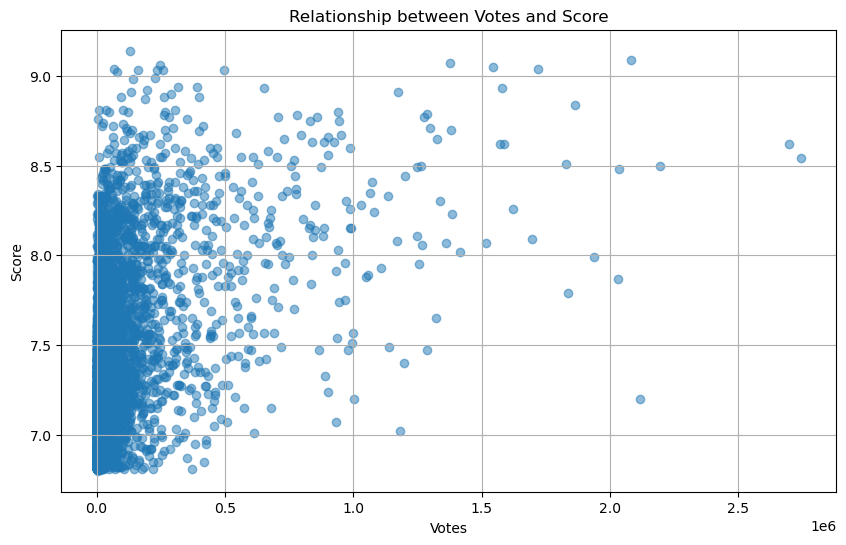

Correlation between Votes and Score: 0.41595161682300186


In [1394]:
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned_2['Vote'], data_cleaned_2['Score'], alpha=0.5)
plt.title("Relationship between Votes and Score")
plt.xlabel("Votes")
plt.ylabel("Score")
plt.grid(True)
plt.show()

# Correlation coefficient
corr_score_vote = data_cleaned_2[['Vote', 'Score']].corr().iloc[0, 1]
print(f"Correlation between Votes and Score: {corr_score_vote}")

This indicates a moderate positive correlation between the number of votes and the anime's score, meaning that as the score increases, the votes increase as well. The relationship is not extremely strong. This suggests a potential relationship where anime with higher engagement (votes) are perceived as higher quality (score). 

Possible Reasons:
- Popular anime are well received by the audience.
- High score animes attract more viewers (and more votes).

As the plot seems to have many outliers, a revision of this points was conducted.

In [1396]:
df = data_cleaned_2

# Define IQR (Interquartile Range) for votes and scores
Q1_votes = df['Vote'].quantile(0.25)
Q3_votes = df['Vote'].quantile(0.75)
IQR_votes = Q3_votes - Q1_votes

Q1_score = df['Score'].quantile(0.25)
Q3_score = df['Score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

# Defining the outliers limits for both variables
votes_lower = Q1_votes - 1.5 * IQR_votes
votes_upper = Q3_votes + 1.5 * IQR_votes

score_lower = Q1_score - 1.5 * IQR_score
score_upper = Q3_score + 1.5 * IQR_score

# Detecting outliers
outliers = df[
    (df['Vote'] < votes_lower) | (df['Vote'] > votes_upper) |
    (df['Score'] < score_lower) | (df['Score'] > score_upper)
]

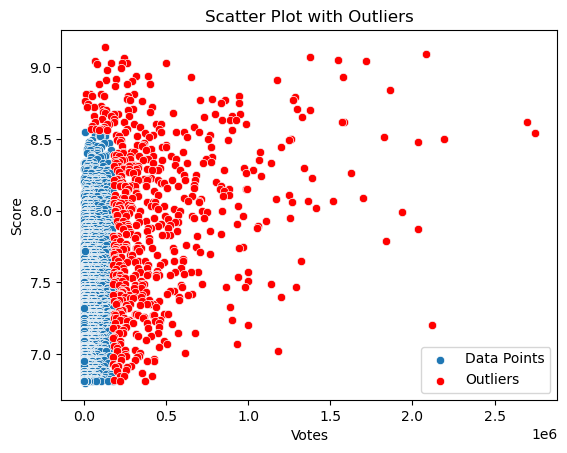

In [785]:
sns.scatterplot(x='Vote', y='Score', data=df, label='Data Points')
sns.scatterplot(x=outliers['Vote'], y=outliers['Score'], color='red', label='Outliers')
plt.title("Scatter Plot with Outliers")
plt.xlabel("Votes")
plt.ylabel("Score")
plt.legend()
plt.show()

These results might seem pretty dramatic, so we have to check the outliers just to understand of they are invalid or irrelevant for the analysis.

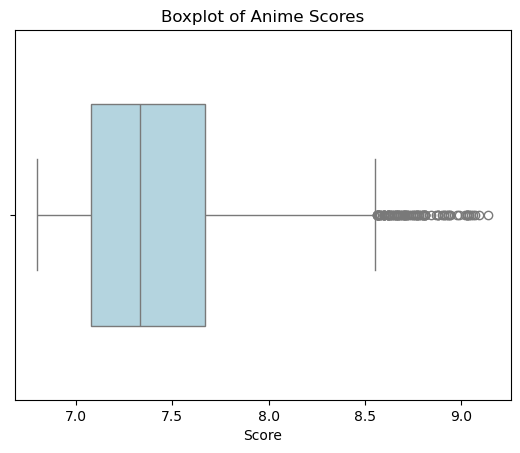

In [961]:
sns.boxplot(x='Score', data=df, color='lightblue', width=0.6)
plt.title("Boxplot of Anime Scores")
plt.xlabel("Score")
plt.show()

Understanding where the mean is, explains the meaning of the outliers. The mean stands between 7 and 7.5, however there are some animes that are above this score. The outliers shall be kept.

**- High Votes, Low Score:** Anime with a large number of votes but low score.

**Possible reasons:**
- Heavily marketed anime that failed to meet expectations.
- Sensitive content that led to mixed reviews.

**- Low Votes, High Score:** An anime with very few votes but an unusually high score.

**Possible reasons:**
- An underrated anime appreciated by a small, dedicated fanbase.
- Recent release or limited accessibility, resulting in fewer votes.

# 3. Is there any anime with a high number of Votes but low Score?

In [1288]:
votes_limits = only_series_3['Vote'].quantile(0.75) 
score_limits = only_series_3['Score'].quantile(0.25)  

high_votes_low_score = only_series_3[(only_series_3['Vote'] > votes_limits) & (only_series_3['Score'] < score_limits)]

print("Anime with high Votes but low Score:")
print(high_votes_low_score[['Title', 'Vote', 'Score']])

Anime with high Votes but low Score:
                                                  Title    Vote  Score
3587    Madan no Ou to VanadisLord Marksman and Vanadis  177943   7.11
3630                                          Love Hina  135297   7.10
3669                                Himouto! Umaru-chan  378005   7.10
3680                                       Black Bullet  484966   7.09
3698                              Vampire Knight Guilty  222405   7.09
...                                                 ...     ...    ...
4879             Gakusen Toshi AsteriskThe Asterisk War  372608   6.81
4906                                         Kiss x Sis  182980   6.82
4934  Shinmai Maou no Testament BurstThe Testament o...  217845   6.81
4939          Black★Rock Shooter (TV)Black Rock Shooter  175137   6.81
4960  Taimadou Gakuen 35 Shiken ShoutaiAnti-Magic Ac...  146677   6.81

[68 rows x 3 columns]


There are animes with many votes and low scores, but there is no case that an Anime has a low score with a great amount of votes.

# 4.How does Popularity correlate with Score?

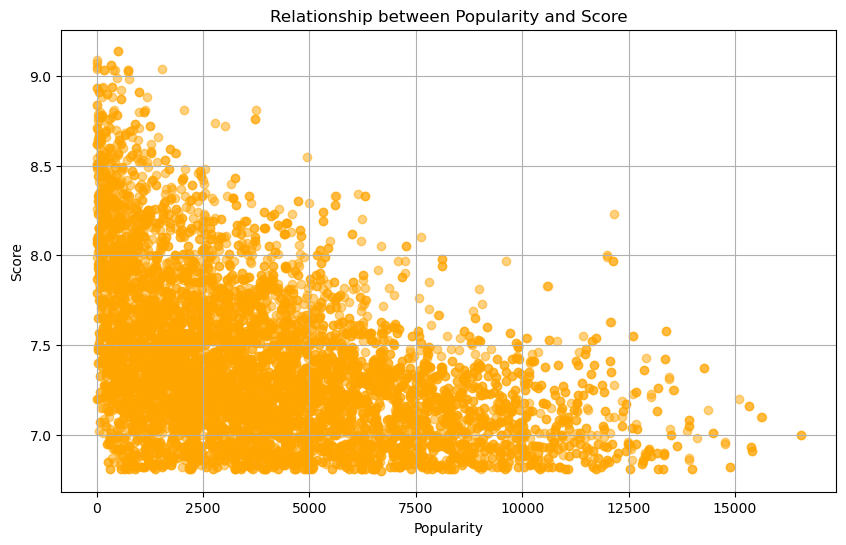

Correlation between Popularity Rank and Score: -0.44723614344155876


In [547]:
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned_2['Popularity'], data_cleaned_2['Score'], alpha=0.5, color='orange')
plt.title("Relationship between Popularity and Score")
plt.xlabel("Popularity")
plt.ylabel("Score")
plt.grid(True)
plt.show()

# Correlation coefficient
corr_pop_score = data_cleaned_2[['Popularity', 'Score']].corr().iloc[0, 1]
print(f"Correlation between Popularity Rank and Score: {correlation}")

The correlation is moderately strong and inverse. A highly rated anime (higher Score) often becomes more popular, resulting in a low Popularity rank.
Conversely, anime with lower Scores are less likely to achieve top popularity rankings. 

Popular anime tends to be high quality: This could indicate that audiences generally favor and vote for anime that are critically acclaimed or well-made. However, there could still be cases where an anime scores well but isn’t popular due to niche appeal or limited reach.

This relationship could also vary depending on external factors like marketing, target audience, or genre preferences.

# 5. What are the most common age Rating categories?

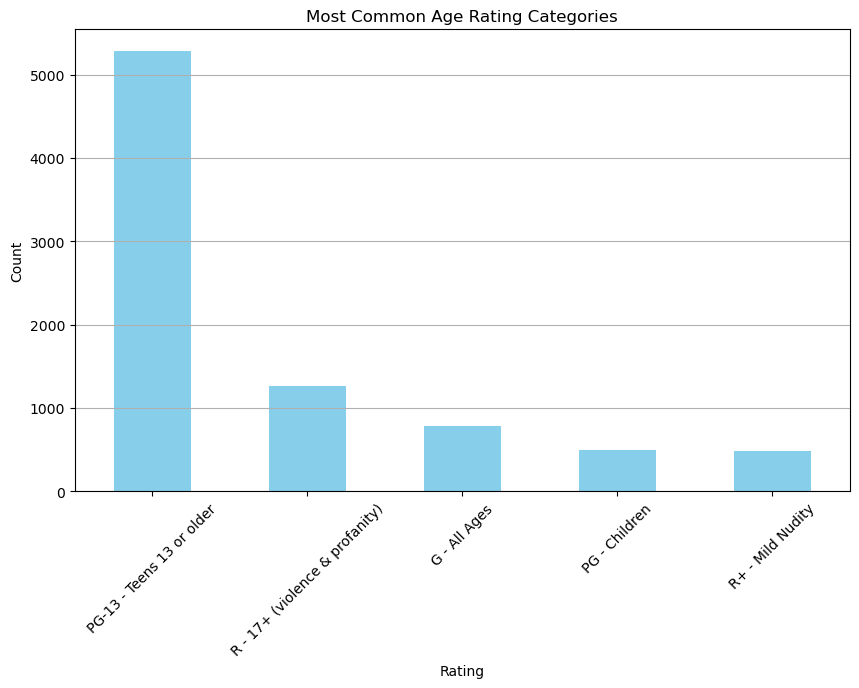

In [551]:
rating_counts = data_cleaned_2['Rating'].value_counts()

# Bar plot for visualization
rating_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Most Common Age Rating Categories")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

This indicates that the most popular animes are the ones that are oriented to teens over 13 years and adults, followed by content R-17. While the least rated Animes are the one with mild nudity.

# 6. How has the average score of anime evolved over time?

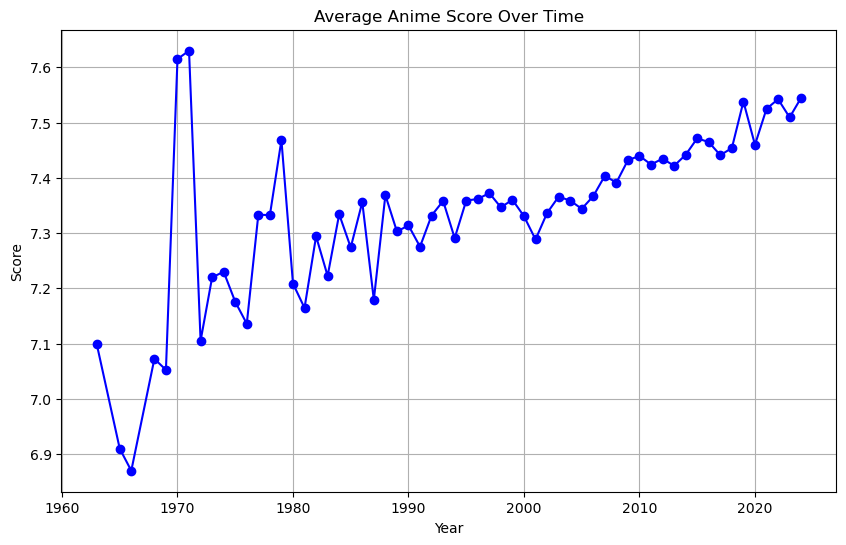

In [811]:
data_cleaned_2['Release Year'] = data_cleaned_2['Release date'].dt.year

# Group by year and calculate the average score
average_score_by_year = data_cleaned_2.groupby('Release Year')['Score'].mean()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(average_score_by_year.index, average_score_by_year.values, marker='o', color='blue')
plt.title('Average Anime Score Over Time')
plt.xlabel('Year')
plt.ylabel('Score')
plt.grid()
plt.show()

This graph suggests that there is a slight upward trend in the average score over the years. The trend is not perfectly linear, there are fluctuations from year to year. This could be related to improvements in productions quality and the influence of technology in the development of new techniques to produce the animes. The evolution in audience preferences might also impact the score throughtout the years. As it is not possible to assess the exact date of the given score, this graph gives a better insight on how animes are perceived by the audience in General Terms throughout time.

# 7. Are animes with more Episodes generally higher-scored?

To do this, we have to separate the series from Movies, Shorts, Special Episodes and OVAs and also filter the airing periods. Generally Anime episodes's duration is around 20 minutes, but this might depend if it includes de intro and outro, or if the episode is longer because the producer decided. However the episodes lasting more than an hour would not be considered as generally they might be OVAs or other types of episodes.

In [1075]:
only_series = data_cleaned_2[data_cleaned_2['Episodes']>2]
only_series_2 = only_series[only_series['Duration_number']>15]
only_series_3 = only_series_2[only_series['Duration_number']<60]

Here we filtered the animes with seasons that have more than 2 episodes which its duration is between 15 and 60 minutes.

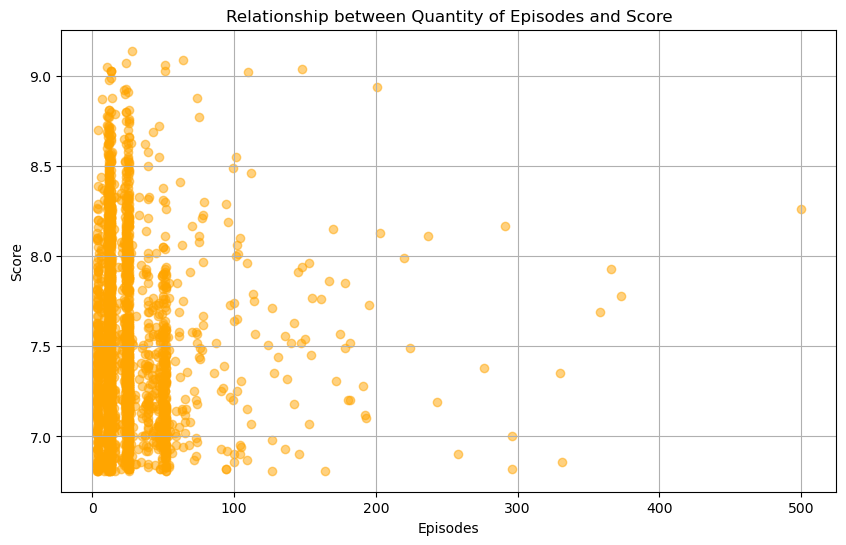

Correlation between Episodes and Score: -0.4419058425953179


In [1294]:
plt.figure(figsize=(10, 6))
plt.scatter(only_series_3['Episodes'], only_series_3['Score'], alpha=0.5, color='orange')
plt.title("Relationship between Quantity of Episodes and Score")
plt.xlabel("Episodes")
plt.ylabel("Score")
plt.grid(True)
plt.show()

corr_ep_score= only_series_3[['Episodes', 'Score']].corr()
print(f"Correlation between Episodes and Score: {correlation}")

The correlation is negative and near zero (not very strong). However this means that the variables are inversely proportional, meaning that the higher the score, the less the quantity of Episodes.

# 8. How does the status of the anime (finished airing or currently airing) affect the score?

In [ ]:
First we have to understand how is the data divided and how many animes are still airing and how many are finished airing.

In [1169]:
data_cleaned_2['Status'].value_counts()

Status
Finished Airing     4915
Currently Airing      49
Name: count, dtype: int64

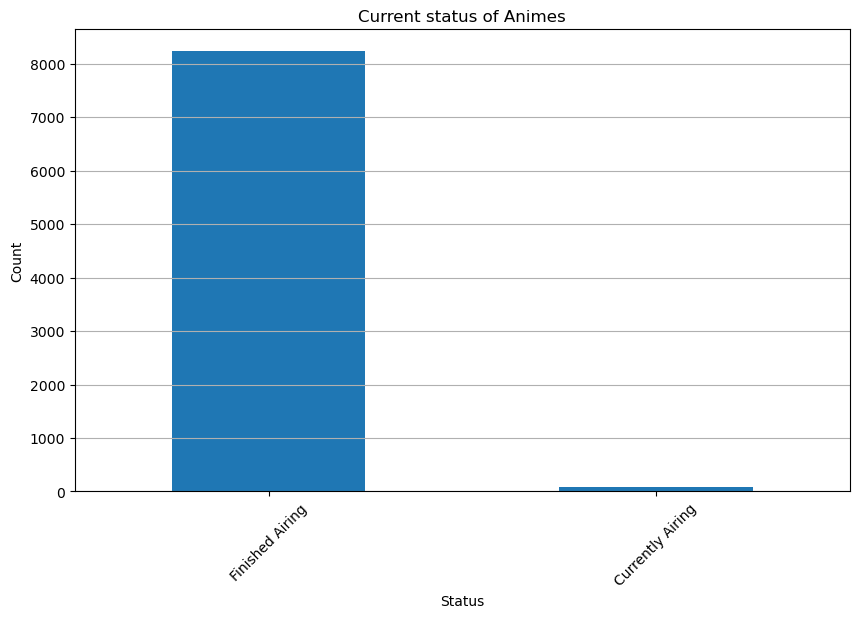

In [553]:
status_counts = data_cleaned_2['Status'].value_counts()

# Bar plot for visualization
status_counts.plot(kind='bar', figsize=(10, 6))
plt.title("Current status of Animes")
plt.xlabel("Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Here we can appreciate that most of the anime series are finished airing, which means that the series that last multiple years are specific cases. From the dataset, 4915 are finished airing while 49 are still ongoing. 

Then we separate the data according to the status and make further analysis.

In [1161]:
subset_status_fa = only_series_3[only_series_3['Status']=='Finished Airing']
subset_status_fa['Duration in years'] = only_series_3['Completed date'].dt.year - only_series_3['Release date'].dt.year

subset_status_ca = only_series_3[only_series_3['Status']=='Currently Airing']
subset_status_ca['Duration in years'] = only_series_3['Completed date'].dt.year - only_series_3['Release date'].dt.year

here we separated the animes that are still airing and the ones that are already finished and we calculated how many years were between the release date and the end date

In [1163]:
avg_score_fa_d = subset_status_fa.groupby('Duration in years')['Score'].mean()
avg_score_ca_d = subset_status_ca.groupby('Duration in years')['Score'].mean()

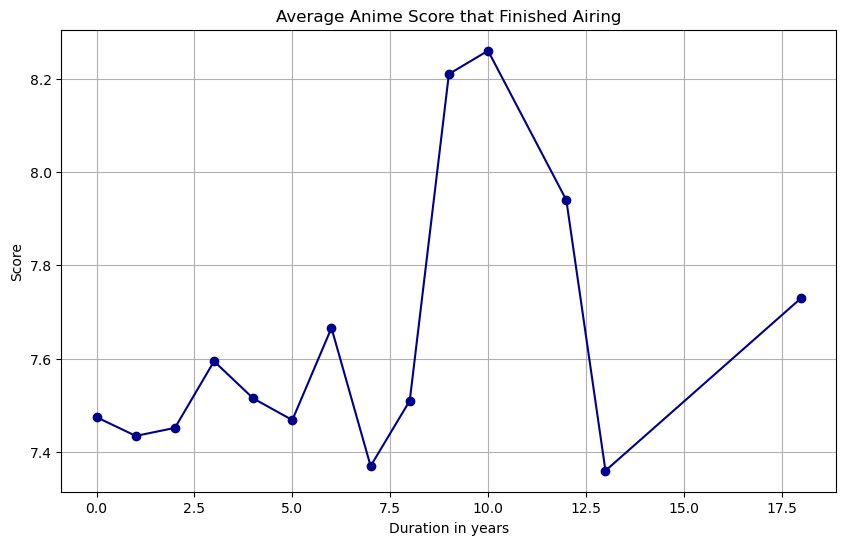

In [1165]:
plt.figure(figsize=(10, 6))
plt.plot(avg_score_fa_d.index, avg_score_fa_d.values, marker='o', color='darkblue')
plt.title('Average Anime Score that Finished Airing')
plt.xlabel('Duration in years')
plt.ylabel('Score')
plt.grid()
plt.show()

In general terms Animes that already finished airing have an average score between 7.4 and 7.7. However, there are some exceptional cases, where animes that were on air between 7.5 and 12.5 years hit higher peaks (7.9 - 8.3)

Here is the list of the 10 longest animes.

In [1147]:
subset_status_fa[subset_status_fa['Duration in years'] > 7.5]

,Title,Score,Vote,Ranked,Popularity,Episodes,Status,Aired,Premiered,Producers,...,Studios,Source,Duration,Rating,Release date,Completed date,Release Year,source_merged,Duration_number,Duration in years
11,Ginga Eiyuu DensetsuLegend of the Galactic Heroes,9.02,77708,12,742,110,Finished Airing,"Jan 8, 1988 to Mar 17, 1997",NaN,"['TV Tokyo', 'Kitty Films', 'Tokuma Shoten', '...",...,"K-Factory, Kitty Film Mitaka Studio",Novel,26 min. per ep.,R - 17+ (violence & profanity),1988-01-08,1997-03-17,1988,Novel,26.0,9.0
289,Naruto: ShippuudenNaruto Shippuden,8.26,1624013,290,15,500,Finished Airing,"Feb 15, 2007 to Mar 23, 2017",Winter 2007,"['TV Tokyo', 'Aniplex', 'KSS', 'Rakuonsha', 'T...",...,Pierrot,Manga,23 min. per ep.,PG-13 - Teens 13 or older,2007-02-15,2017-03-23,2007,Manga,23.0,10.0
699,Gensou Mangekyou: The Memories of PhantasmTouh...,7.94,1811,699,8119,18,Finished Airing,"Aug 12, 2011 to May 7, 2023",NaN,['add some'],...,"None found, add some",Game,16 min. per ep.,PG-13 - Teens 13 or older,2011-08-12,2023-05-07,2011,Game,16.0,12.0
701,Bleach,7.93,1108736,701,39,366,Finished Airing,"Oct 5, 2004 to Mar 27, 2012",Fall 2004,"['TV Tokyo', 'Aniplex', 'Dentsu', 'TV Tokyo Mu...",...,Pierrot,Manga,24 min. per ep.,PG-13 - Teens 13 or older,2004-10-05,2012-03-27,2004,Manga,24.0,8.0
998,Kochira Katsushikaku Kameari Kouenmae Hashutsujo,7.78,6732,999,4932,373,Finished Airing,"Jun 16, 1996 to Dec 19, 2004",Summer 1996,"['Asatsu DK', 'Fuji TV']",...,Gallop,Manga,25 min. per ep.,PG-13 - Teens 13 or older,1996-06-16,2004-12-19,1996,Manga,25.0,8.0
1117,Black Jack,7.73,11861,1118,3451,12,Finished Airing,"Dec 21, 1993 to Dec 16, 2011",NaN,"['Animax', 'Akita Shoten']",...,Tezuka Productions,Manga,50 min. per ep.,R+ - Mild Nudity,1993-12-21,2011-12-16,1993,Manga,50.0,18.0
1888,Be-Bop Highschool,7.47,1949,1895,6739,7,Finished Airing,"Jan 26, 1990 to Oct 1998",NaN,['add some'],...,Toei Animation,Manga,50 min. per ep.,R+ - Mild Nudity,1990-01-26,1998-10-01,1990,Manga,50.0,8.0
2184,Hori-san to Miyamura-kun,7.40,44384,2194,1785,6,Finished Airing,"Sep 26, 2012 to May 25, 2021",NaN,['add some'],...,"Gonzo, Hoods Entertainment, Studio...",Web manga,23 min. per ep.,PG-13 - Teens 13 or older,2012-09-26,2021-05-25,2012,Manga,23.0,9.0
2346,Shounan Bakusouzoku,7.36,748,2357,8624,12,Finished Airing,"Sep 10, 1986 to Mar 12, 1999",NaN,['add some'],...,Toei Animation,Manga,53 min. per ep.,R - 17+ (violence & profanity),1986-09-10,1999-03-12,1986,Manga,53.0,13.0
4696,Kiteretsu DaihyakkaKiteretsu Encyclopedia,6.86,3501,4734,7718,331,Finished Airing,"Mar 27, 1988 to Jun 9, 1996",Spring 1988,['Fuji TV'],...,Gallop,Manga,25 min. per ep.,PG - Children,1988-03-27,1996-06-09,1988,Manga,25.0,8.0


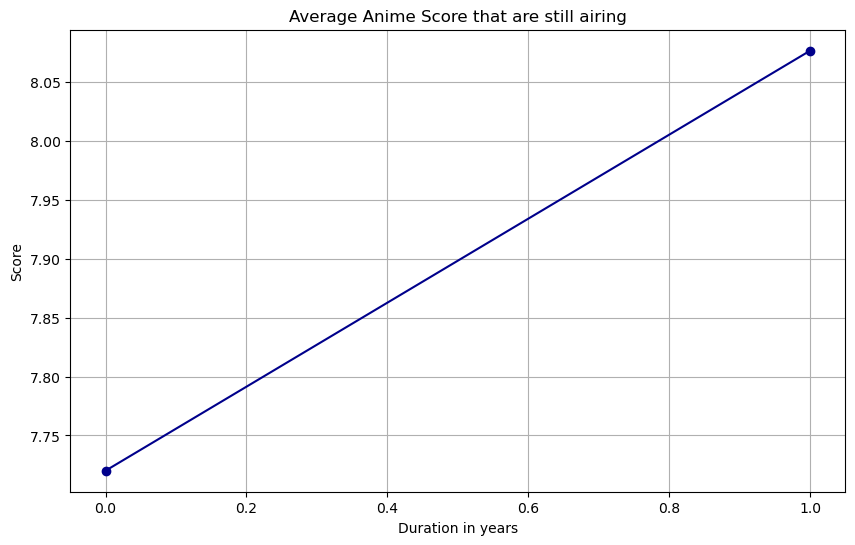

In [1167]:
plt.figure(figsize=(10, 6))
plt.plot(avg_score_ca_d.index, avg_score_ca_d.values, marker='o', color='darkblue')
plt.title('Average Anime Score that are still airing')
plt.xlabel('Duration in years')
plt.ylabel('Score')
plt.grid()
plt.show()

Animes that are still airing have an increasing trend in the score results, starting above the average (7.7 - 8.1). It is expected to have a growing trend in this case, because as the series is still developing the score is not definitive and also, as there are less animes in comparison with the ones that finished airing, the score tends to be higher.

# 9. What are the most common Source materials for high-scoring anime?

The source of the animes tend to be diverse, however to have a better understanding of the possible sources, a bigger categorization of the sources is made

In [831]:
# Function to categorize based on keywords
def categorize(Source):
    if 'manga' in Source.lower():
        return 'Manga'
    elif 'book' in Source.lower():
        return 'Book'
    elif 'novel' in Source.lower():
        return 'Novel'
    else:
        return Source

# Apply the categorization function to the 'Source' column
data_cleaned_2['source_merged'] = data_cleaned_2['Source'].apply(categorize)

# Count the occurrences of the merged categories
merged_counts = data_cleaned_2['source_merged'].value_counts()

print(merged_counts) 

source_merged
Manga          2468
Original       1003
Novel           972
Game            240
Unknown         104
Other            80
Mixed media      40
Book             38
Music            10
Card game         9
Name: count, dtype: int64


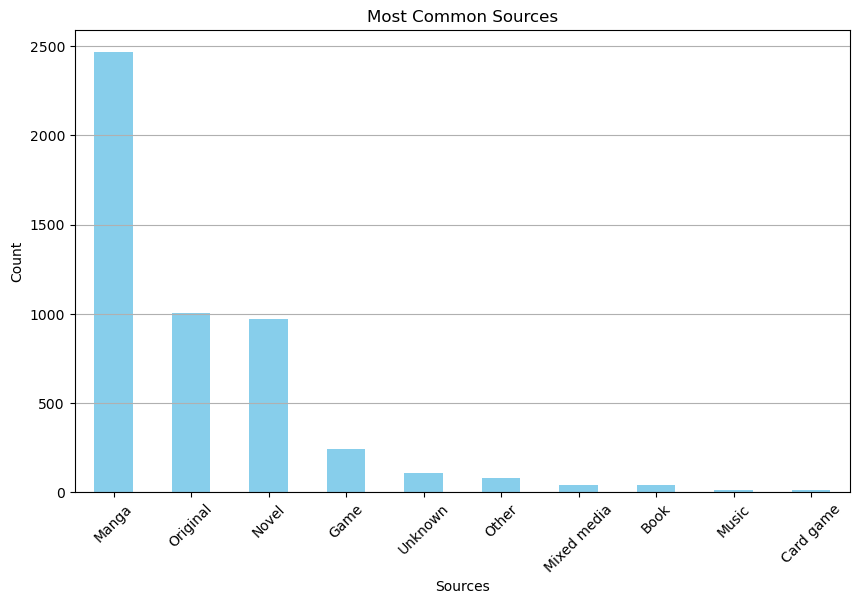

In [833]:
merged_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Most Common Sources")
plt.xlabel("Sources")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

This graph shows that most of the Animes are based on Mangas, followed by original stories, novels or games. However it could be interesting to study the score of the Animes according to their sources.

In [851]:
source_avg_score = (data_cleaned_2.groupby('source_merged')['Score'].mean().sort_values(ascending=False))

# Combine score and count into a DataFrame for better insights
source_analysis = pd.DataFrame({
    'Average Score': source_avg_score,
    'Count': merged_counts
}).sort_values(by='Average Score', ascending=False)

print(source_analysis)

               Average Score  Count
source_merged                      
Manga               7.487253   2468
Novel               7.433097    972
Mixed media         7.383250     40
Original            7.355583   1003
Other               7.332000     80
Book                7.279474     38
Music               7.245000     10
Card game           7.228889      9
Game                7.225958    240
Unknown             7.121442    104


The average score of animes is around 7 points on a scale from 1 to 10, being the source of the story irrelevant for this purpose. However we want to check if the success of top rated animes rely on the source of inspiration.

In [877]:
top_rated_animes = data_cleaned_2[data_cleaned_2['Score']>8]

In [881]:
source_top_score = top_rated_animes['source_merged'].value_counts()
print(source_top_score)

source_merged
Manga          372
Novel          130
Original        82
Game             6
Other            3
Mixed media      3
Book             2
Unknown          1
Music            1
Name: count, dtype: int64


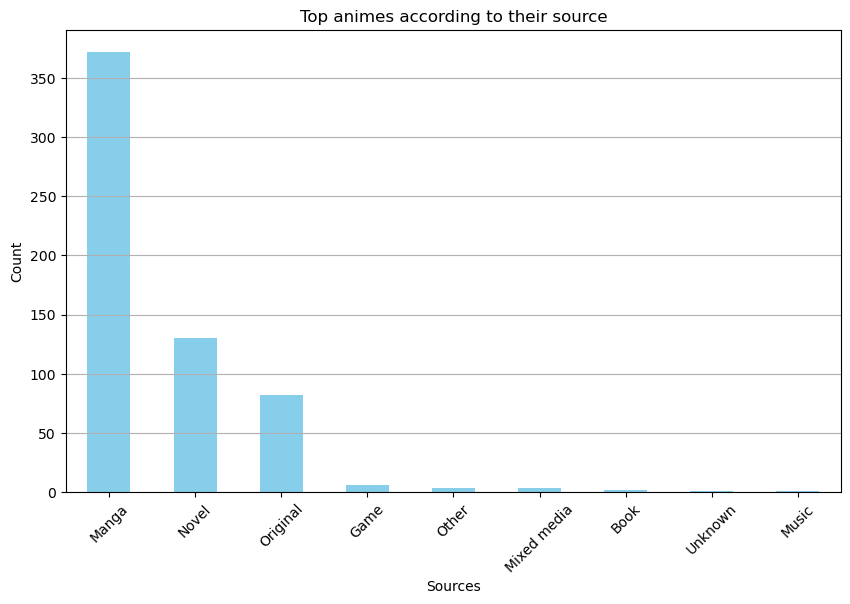

In [889]:
source_top_score.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Top animes according to their source")
plt.xlabel("Sources")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

According to this graph, the top rated animes come from Mangas, Novels and Original stories

# 10.What are the most common duration of Episodes?

As the Duration column is an object and we want to extract only the number to answer this question

In [1211]:
only_series_3['Duration_number'] = only_series_3['Duration'].str.extract(r'(\d+)').astype(float)

In [1217]:
common_duration = only_series_3['Duration_number'].value_counts()

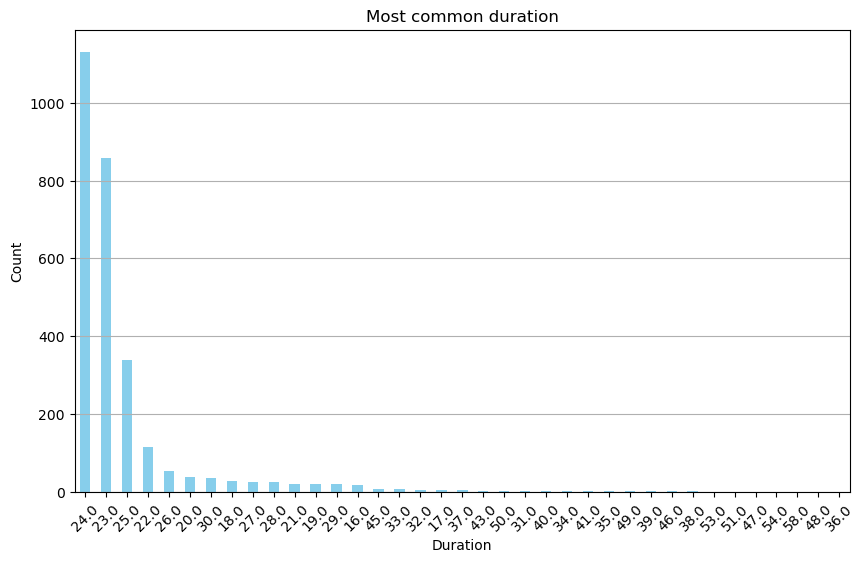

In [1219]:
common_duration.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Most common duration")
plt.xlabel("Duration")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
Most of the episodes last between 20-26 minutes, being the most common 24 minutes.

# 11.	Do shorter or longer anime (Duration) tend to have higher scores?

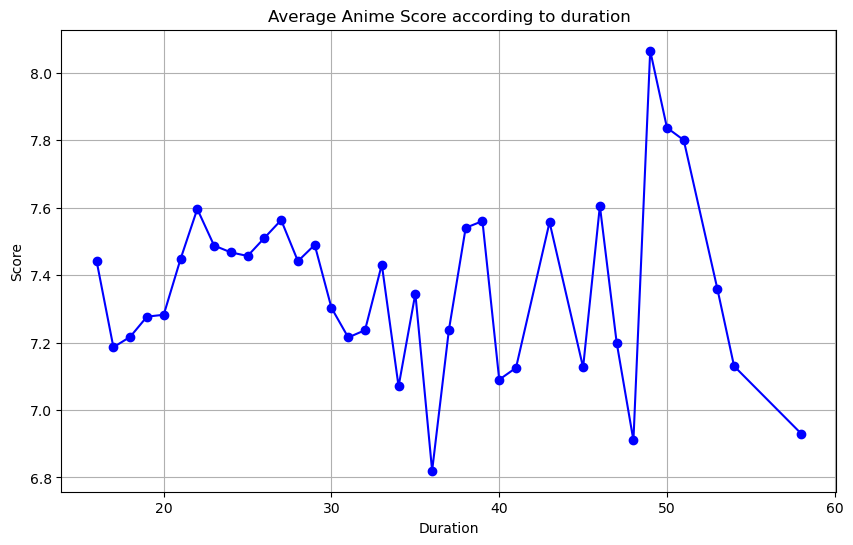

In [1240]:
avg_duration = only_series_3.groupby('Duration_number')['Score'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_duration.index, avg_duration.values, marker='o', color='blue')
plt.title('Average Anime Score according to duration')
plt.xlabel('Duration')
plt.ylabel('Score')
plt.grid()
plt.show()

In general terms, animes that last between 20 and 30 minutes have averages scores. However, there are exceptional cases where Episodes that lasted longer had a better score. From this, we can say that thee is no specific trend regarding the duration of the episode and the Score.

# 12. What are the most common episode counts?

In [1258]:
only_series_3['Episodes'].value_counts().head(10)

Episodes
12    789
13    395
26    239
24    167
25    125
3      96
11     77
52     71
4      64
10     59
Name: count, dtype: Int64

The 10 most common counts of episodes per series is listed above. Most of the series have between 12-13 episodes, followed by series with 24-26 Episodes.

# 13. What is the relationship between Popularity and Votes?

In [1410]:
corr_pop_vote = only_series_3['Popularity'].corr(df['Vote'])
print("Correlation between Popularity and Votes:", correlation)

Correlation between Popularity and Votes: -0.44121418862990663


The correlation is negative, meaning that as the number of votes increases, the popularity rank decreases, indicating a higher popularity, since lower ranks are better.

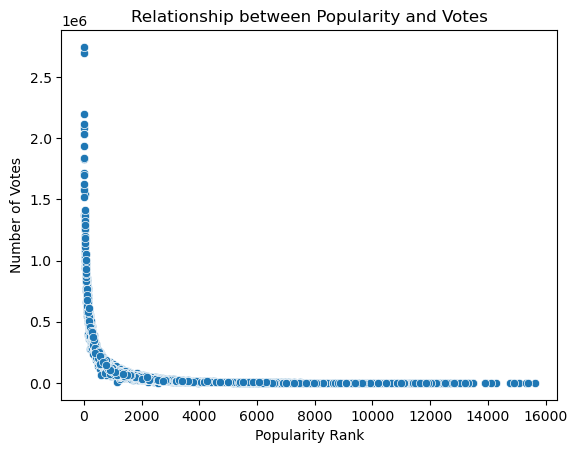

In [1311]:
sns.scatterplot(x='Popularity', y='Vote', data=only_series_3)
plt.title("Relationship between Popularity and Votes")
plt.xlabel("Popularity Rank")
plt.ylabel("Number of Votes")
plt.show()

This relationship shows that more popular anime (low rank) tend to gather a higher number of Votes. Hence, a negative correlation would indicate this trend.

# Conclusions

The higher the votes, the higher the score and the higher the position in Popularity Ranking (more popular). According to this study, higher scorer animes have less Episodes. Current animes have better scores than animes that were finished airing before 2024.

The most common Rating is PG-13 and are mainly based on Mangas, Novels, or Original Stories. The average episode lasts 24 minutes and has an average score of 7.5 points.

Anime is a global phenomenon that has showcased an increasing trend behavior and might continue to increase in the following years.

If I had to recommend an anime based on the variables of these study I would weigh the Score, Votes and Popularity. I wouldn't recommend using the Rank as it is a consequence of the score, then it would mean considering the score twice. On the other hand, I would recommend selecting animes with duration of Episodes between 20-26 minutes and a maximum 12-13 Episodes per Season.

Comments about the dataset - Limitations:
- Having the series separated by seasons prevents having accurate results
- Having series mixed with movies, especial episodes and OVAs makes harder to have a better overview of the situation
- Having a column regarding the genres of the animes, would have been helpful. This dataset comes with a Manga dataset, and both would have been crossed (at least to study only the animes based in Mangas) but I didn't found a way to join them. The only common column was the Title and if somehow one of them was misspelled, this might traduce to many NaN values or errors.
- Having information related to the costs of the licenses or costs of copyright, would have been helpful to give an insight about which anime would be better to invest in.